Slacked off with my weekly practice, time to get back and it and what's better way than with a timeseries dataset

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = "FB_data.csv"
tseries_df = pd.read_csv(data)

tseries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [4]:
tseries_df.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
69,9/27/2019,180.490005,180.759995,175.660004,177.100006,177.100006,14656200
218,5/1/2020,201.600006,207.279999,199.050003,202.270004,202.270004,30415600
185,3/16/2020,152.320007,159.130005,143.100006,146.009995,146.009995,39120400
247,6/12/2020,229.899994,231.660004,224.500000,228.580002,228.580002,22071700
21,7/22/2019,199.910004,202.570007,198.809998,202.320007,202.320007,13589000


In [5]:
tseries_df.duplicated().sum()

0

In [6]:
tseries_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
tseries_df['Date'] = pd.to_datetime(tseries_df['Date'])

In [8]:
tseries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       253 non-null    datetime64[ns]
 1   Open       253 non-null    float64       
 2   High       253 non-null    float64       
 3   Low        253 non-null    float64       
 4   Close      253 non-null    float64       
 5   Adj Close  253 non-null    float64       
 6   Volume     253 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 14.0 KB


<Axes: xlabel='Date'>

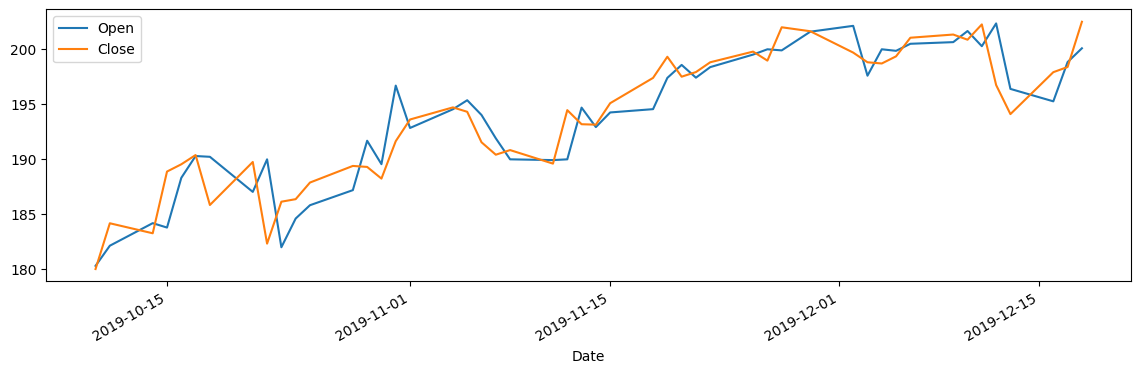

In [9]:
(tseries_df.set_index('Date')).loc['10/10/2019':'12/18/2019'][['Open', 'Close']].plot.line(figsize=(14,4))

<Axes: ylabel='Date'>

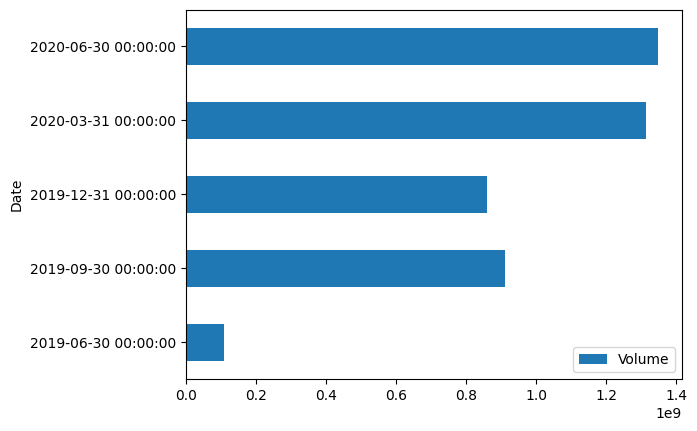

In [10]:
(tseries_df.groupby(pd.Grouper(key='Date', freq='3m'))[['Volume']].sum().plot.barh())

In [16]:
(pd.pivot_table(tseries_df,
            'Volume',
            index=tseries_df['Date'].dt.day_name(),
            columns=pd.Grouper(key='Date', freq='3M'),
            aggfunc='sum',
            fill_value=0))

Date,2019-06-30,2019-09-30,2019-12-31,2020-03-31,2020-06-30
Date,,,,,
Friday,39130100,191429300,180897700,269175900,264289300
Monday,15509000,169801300,156649700,242144400,194459300
Thursday,25794700,183779400,181979300,284439600,304636600
Tuesday,16750300,171917300,179287800,278467500,263421100
Wednesday,12808600,193368600,161953700,240090900,320975100


In [12]:
(tseries_df.set_index('Date'))

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-20,190.949997,191.160004,187.639999,189.529999,189.529999,14635700
2019-06-21,188.750000,192.000000,188.750000,191.139999,191.139999,22751200
2019-06-24,192.419998,193.979996,191.570007,192.600006,192.600006,15509000
2019-06-25,192.880005,193.139999,188.130005,188.839996,188.839996,16750300
2019-06-26,189.539993,190.759995,187.309998,187.660004,187.660004,12808600
...,...,...,...,...,...,...
2020-06-15,225.089996,233.770004,224.800003,232.500000,232.500000,15340300
2020-06-16,237.139999,238.460007,233.000000,235.649994,235.649994,15236700
2020-06-17,235.000000,237.589996,231.729996,235.529999,235.529999,19552800
